In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

data = pd.read_csv("../data/2021.csv", na_values="?")
data.fillna(data.median(), inplace=True)
data = data.rename(columns={"class": "isBankrupt"})

x = data.drop(['isBankrupt'], axis=1)
y = data['isBankrupt']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

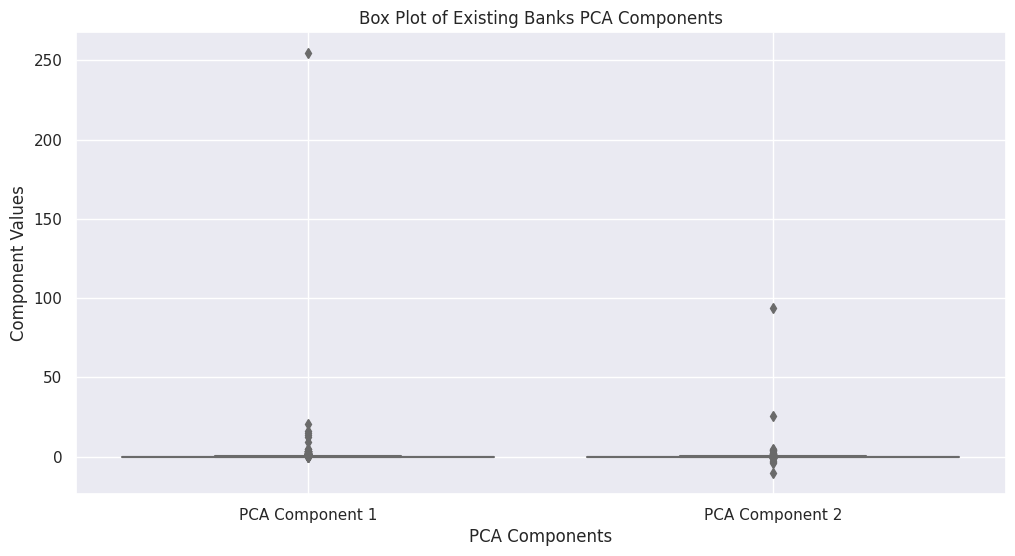

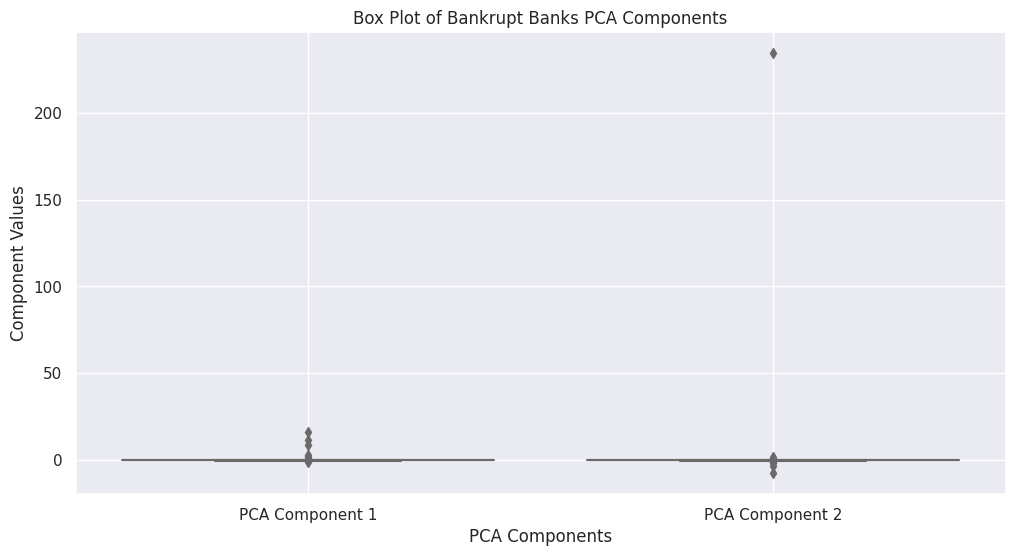

In [15]:
# Compress the features into 2 dimension
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

existing_banks = X_pca[y == 0]
bankrupt_banks = X_pca[y == 1]

plt.figure(figsize=(12, 6))

sns.boxplot(data=existing_banks, color='blue', palette="Set3")
plt.title('Box Plot of Existing Banks PCA Components')
plt.xlabel('PCA Components')
plt.ylabel('Component Values')
plt.xticks([0, 1], ['PCA Component 1', 'PCA Component 2'])
plt.grid(True)

plt.show()

plt.figure(figsize=(12, 6))

sns.boxplot(data=bankrupt_banks, color='red', palette="Set3")
plt.title('Box Plot of Bankrupt Banks PCA Components')
plt.xlabel('PCA Components')
plt.ylabel('Component Values')
plt.xticks([0, 1], ['PCA Component 1', 'PCA Component 2'])
plt.grid(True)

plt.show()

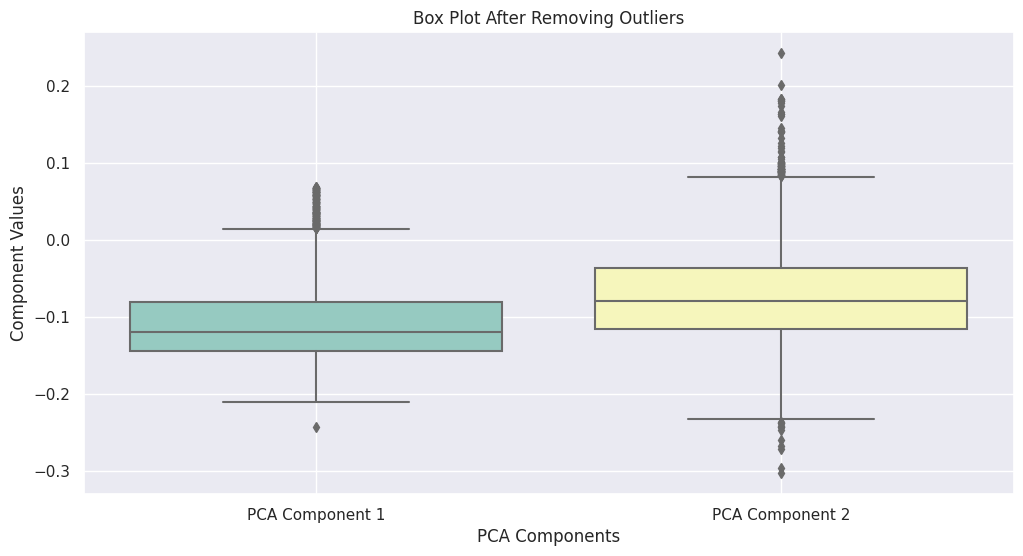

In [16]:
def remove_outliers(data):
    # Calculate IQR
    Q1 = np.percentile(data, 25, axis=0)
    Q3 = np.percentile(data, 75, axis=0)
    IQR = Q3 - Q1

    # Define the boundary of outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    is_not_outlier = (data >= lower_bound) & (data <= upper_bound)

    mask = is_not_outlier.all(axis=1)
    return data[mask]

# Remove the outliers.
existing_banks = remove_outliers(existing_banks)
bankrupt_banks = remove_outliers(bankrupt_banks)


plt.figure(figsize=(12, 6))
sns.boxplot(data=np.vstack([existing_banks, bankrupt_banks]), color='green', palette="Set3")
plt.title('Box Plot After Removing Outliers')
plt.xlabel('PCA Components')
plt.ylabel('Component Values')
plt.xticks([0, 1], ['PCA Component 1', 'PCA Component 2'])
plt.grid(True)
plt.show()


In [17]:
# Using k-means to clustering.
kmeans_bankrupt = KMeans(n_clusters=20, random_state=0)
kmeans_existing = KMeans(n_clusters=20, random_state=0)

kmeans_bankrupt.fit(bankrupt_banks)
kmeans_existing.fit(existing_banks)

# Find every data point nearest the center of a cluster
def find_representatives(cluster_data, kmeans):
    representatives = []
    for center in kmeans.cluster_centers_:
        distances = ((cluster_data - center)**2).sum(axis=1)
        representative_idx = distances.argmin()
        representatives.append(representative_idx)
    return representatives

rep_bankrupt_idx = find_representatives(bankrupt_banks, kmeans_bankrupt)
rep_existing_idx = find_representatives(existing_banks, kmeans_existing)

representative_bankrupt = data.iloc[y[y == 1].index[rep_bankrupt_idx]]
representative_existing = data.iloc[y[y == 0].index[rep_existing_idx]]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


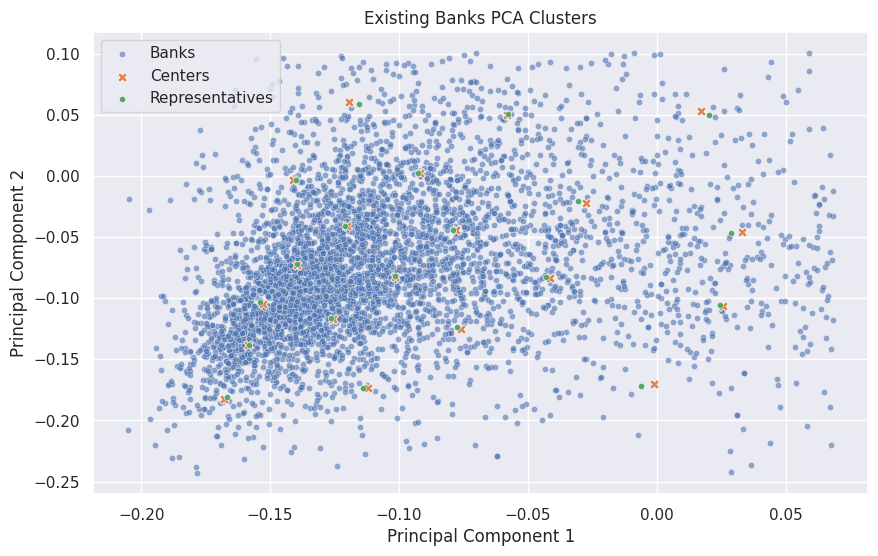

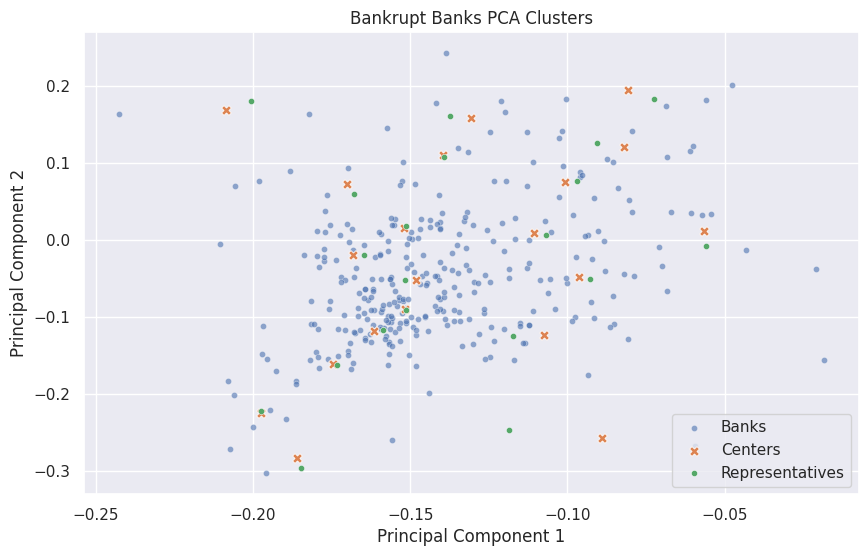

In [18]:
def log(data):
    return np.log(data - np.min(data, axis=0) + 1)


def power(data):
    return np.power(data, 2)

def nothing(data):
    return data

centers_bankrupt = (kmeans_bankrupt.cluster_centers_)
centers_existing = (kmeans_existing.cluster_centers_)
rep_bankrupt = (bankrupt_banks[rep_bankrupt_idx])
rep_existing = (existing_banks[rep_existing_idx])

def plot_clusters(points, centers, representatives, x_trans, y_trans, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_trans(points[:, 0]), y=y_trans(points[:, 1]), alpha=0.6, s=20, label='Banks')
    sns.scatterplot(x=x_trans(centers[:, 0]), y=y_trans(centers[:, 1]), s=50, label='Centers', marker='X')
    sns.scatterplot(x=x_trans(representatives[:, 0]), y=y_trans(representatives[:, 1]), s=20, label='Representatives')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

plot_clusters(existing_banks, centers_existing, rep_existing, nothing, nothing, 'Existing Banks PCA Clusters')

plot_clusters(bankrupt_banks, centers_bankrupt, rep_bankrupt, nothing, nothing, 'Bankrupt Banks PCA Clusters')

In [19]:
print("Representative Existing:")
print(representative_existing)
print("Representative Bankrupt:")
print(representative_bankrupt)

Representative Existing:
            X1        X2        X3         X4        X5        X6        X7  \
3631  0.032071  0.285910  0.189120    1.66150   12.9260  0.000000  0.032071   
2080  0.164380  0.694380  0.570050    2.40320   40.4810 -0.058212  0.185480   
1292  0.204630  0.109020  0.667350   20.09300   30.1590  0.582030  0.204630   
2743 -0.002368  0.981840 -0.054133    0.94486  -81.1630 -0.000020 -0.005660   
2219  0.321380  0.107470  0.225800    4.55020  845.6600  0.000000  0.383320   
2486  0.071770  0.517850  0.200210    1.42880  -49.5210 -0.011682  0.071770   
2275  0.015686  0.237670  0.712590    3.99820   68.2410  0.000000  0.022949   
3247 -0.063563  1.011900  0.183090    1.22900   14.2220 -0.010969 -0.063563   
1206  0.421040  0.166860  0.610000    4.65580   94.9190  1.100800  0.521440   
3414  0.577090  0.238180  0.148470    1.76920   23.1990  0.493340  0.577090   
3887  0.025622  0.601870  0.107850    1.22120  -71.4590  0.000000  0.024617   
738   0.048254  0.671910  0

In [20]:
# Check if any of the selected bank has a NaN value of a feature
print(representative_existing.isnull().values.any())
print(representative_bankrupt.isnull().values.any())

False
False


In [21]:
from sklearn.model_selection import train_test_split

representative_bankrupt['isBankrupt'] = 1  # Add label back
representative_existing['isBankrupt'] = 0  # Add label back

# Merge the data
representative_banks = pd.concat([representative_bankrupt, representative_existing])

# Extract label and feature
X_representative = representative_banks.drop(columns=['isBankrupt'])
y_representative = representative_banks['isBankrupt']

# Using other banks as test data
other_banks = data.drop(representative_banks.index)
X_other = other_banks.drop(columns=['isBankrupt'])
y_other = other_banks['isBankrupt']

# Split the validation set
X_train, X_test, y_train, y_test = train_test_split(X_representative, y_representative, test_size=0.2, random_state=42)


/tmp/ipykernel_5382/2257709049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  representative_bankrupt['isBankrupt'] = 1  # Add label back
/tmp/ipykernel_5382/2257709049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  representative_existing['isBankrupt'] = 0  # Add label back


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Init random forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Assess the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy on representative test set:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.80      0.89         5

    accuracy                           0.88         8
   macro avg       0.88      0.90      0.87         8
weighted avg       0.91      0.88      0.88         8

Accuracy on representative test set: 0.875


In [23]:
# Apply the mode
y_other_pred = clf.predict(X_other)

# Assess the result
print("Accuracy on other banks:", accuracy_score(y_other, y_other_pred))
print(classification_report(y_other, y_other_pred))


Accuracy on other banks: 0.7185689948892675
              precision    recall  f1-score   support

           0       0.98      0.72      0.83      5480
           1       0.16      0.74      0.26       390

    accuracy                           0.72      5870
   macro avg       0.57      0.73      0.54      5870
weighted avg       0.92      0.72      0.79      5870

